In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_excel("Correlation.xlsx")

In [4]:
dataset

,Respondent Number,Attitude,Duration
0,1,6,10
1,2,9,12
2,3,8,12
3,4,3,4
4,5,10,12
5,6,4,6
6,7,5,8
7,8,2,2
8,9,11,18
9,10,9,9


In [5]:
dataset.isnull().any()

Respondent Number    False
Attitude             False
Duration             False
dtype: bool

In [6]:
import seaborn as sns

In [7]:
corr_cols = dataset[['Respondent Number','Attitude','Duration']]

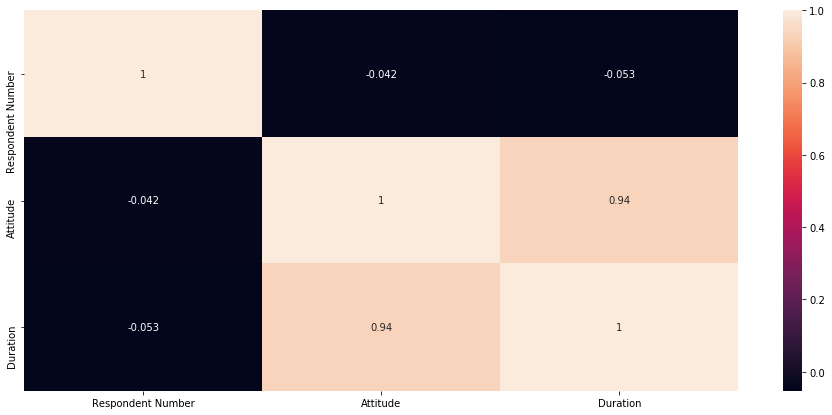

In [8]:
corr = corr_cols.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr,annot=True)
plt.show()

In [9]:
dataset=pd.read_excel("ANCOVA1.xlsx")

In [10]:
dataset

,Store Number,Sales,Promotion,Coupon,ClietelRatings
0,1,10,1,1,9
1,2,9,1,1,10
2,3,10,1,1,8
3,4,8,1,1,4
4,5,9,1,1,6
5,6,8,2,1,8
6,7,8,2,1,4
7,8,7,2,1,10
8,9,9,2,1,6
9,10,6,2,1,9


In [11]:
dataset.isnull().any()

Store Number      False
Sales             False
Promotion         False
Coupon            False
ClietelRatings    False
dtype: bool

In [12]:
dataset.head()

,Store Number,Sales,Promotion,Coupon,ClietelRatings
0,1,10,1,1,9
1,2,9,1,1,10
2,3,10,1,1,8
3,4,8,1,1,4
4,5,9,1,1,6


In [13]:
dataset.tail()

,Store Number,Sales,Promotion,Coupon,ClietelRatings
25,26,2,3,2,4
26,27,3,3,2,6
27,28,2,3,2,10
28,29,1,3,2,9
29,30,2,3,2,8


In [15]:
dataset.columns

Index(['Store Number', 'Sales', 'Promotion', 'Coupon', 'ClietelRatings'], dtype='object')

In [18]:
import statsmodels.api as sm

from statsmodels.formula.api import ols


In [19]:
model=ols('Sales~C(Promotion)',dataset).fit()
oneway=sm.stats.anova_lm(model,typ=2)
print(oneway)

                  sum_sq    df          F    PR(>F)
C(Promotion)  106.066667   2.0  17.943609  0.000011
Residual       79.800000  27.0        NaN       NaN


In [20]:
model=ols('Sales~C(Promotion)*C(Coupon)',dataset).fit()
twoway=sm.stats.anova_lm(model,typ=2)
print(twoway)

                            sum_sq    df          F        PR(>F)
C(Promotion)            106.066667   2.0  54.862069  1.116908e-09
C(Coupon)                53.333333   1.0  55.172414  1.143879e-07
C(Promotion):C(Coupon)    3.266667   2.0   1.689655  2.058092e-01
Residual                 23.200000  24.0        NaN           NaN


In [22]:
from scipy.stats import wilcoxon
dataset=pd.read_excel("1 Wilcoxon.xlsx")
dataset

,ID,TRT,AGE,WEIGHIN,STAGE,TOTALCIN,TOTALCW2,TOTALCW4,TOTALCW6
0,1,0,52,124.0,2,6,6,6,7
1,5,0,77,160.0,1,9,6,10,9
2,6,0,60,136.5,4,7,9,17,19
3,9,0,61,179.6,1,6,7,9,3
4,11,0,59,175.8,2,6,7,16,13
5,15,0,69,167.6,1,6,6,6,11
6,21,0,67,186.0,1,6,11,11,10
7,26,0,56,158.0,3,6,11,15,15
8,31,0,61,212.8,1,6,9,6,8
9,35,0,51,189.0,1,6,4,8,7


In [23]:
dataset.head()

,ID,TRT,AGE,WEIGHIN,STAGE,TOTALCIN,TOTALCW2,TOTALCW4,TOTALCW6
0,1,0,52,124.0,2,6,6,6,7
1,5,0,77,160.0,1,9,6,10,9
2,6,0,60,136.5,4,7,9,17,19
3,9,0,61,179.6,1,6,7,9,3
4,11,0,59,175.8,2,6,7,16,13


In [24]:
d1=dataset.TOTALCIN
d2=dataset.TOTALCW2
stat, p=wilcoxon(d1,d2)
print(stat,p)

29.5 0.00259741456482452


In [25]:
from scipy.stats import friedmanchisquare
d3=dataset.TOTALCW4
stat,p=friedmanchisquare(d1,d2,d3)
print(stat,p)

27.927710843373504 8.62133745016363e-07


In [26]:
from scipy.stats import mannwhitneyu

In [27]:
dataset1=pd.read_excel("3 Mann Whitney.xlsx")

In [28]:
dataset1

,Sales,Design,Store Size
0,11,1,1
1,17,1,2
2,16,1,3
3,14,1,4
4,15,1,5
5,12,2,1
6,10,2,2
7,15,2,3
8,19,2,4
9,11,2,5


In [29]:
dataset1.head()

,Sales,Design,Store Size
0,11,1,1
1,17,1,2
2,16,1,3
3,14,1,4
4,15,1,5


In [31]:
a1=dataset1.Design
a2=dataset1.Design
stat,p=mannwhitneyu(a1,a2)
print(stat,p)

50.0 0.4826160142572994


In [32]:
from scipy.stats import kruskal
dataset2=pd.read_excel("4 Kruskal Wallis.xlsx")

In [33]:
dataset2.head()

,Design1,Design2,Design3,Showroom
0,11,12,23,1
1,17,10,20,2
2,16,15,18,3
3,14,19,17,4
4,15,11,10,5


In [35]:
b1=dataset2.Design1
b2=dataset2.Design2
b3=dataset2.Design3
stat,p=kruskal(b1,b2,b3)
print(stat,p)

2.7345323741007226 0.25480259087913626


In [36]:
from scipy.stats import ttest_1samp

In [37]:
dataset3=pd.read_excel("1. One Sample.xlsx")

In [38]:
dataset3

,ids,Height
0,43783,72.35
1,20278,70.66
2,20389,70.68
3,24559,67.43
4,28980,68.45
...,...,...
403,36563,66.26
404,40697,68.50
405,34272,68.10
406,33628,69.27


In [39]:
h1=dataset3.Height
stat,p=ttest_1samp(h1,65)
print(stat,p)

11.498800238580099 1.087893570160242e-26


In [40]:
from scipy.stats import ttest_rel

In [41]:
dataset4=pd.read_excel("2. Paired Sample.xlsx")
dataset4.head()

,ids,English,Math
0,43783,88.24,60.02
1,20278,89.45,70.19
2,20389,96.73,71.20
3,22820,74.06,55.89
4,24559,82.61,65.52


In [42]:
p1=dataset4.English
p2=dataset4.Math
stat,p=ttest_rel(p1,p2)
print(stat,p)

36.312568981719856 3.0710987192210606e-128


In [43]:
from scipy.stats import ttest_ind

In [45]:
dataset5=pd.read_excel("3. Independent Sample.xlsx")
dataset5.head()

,ids,Athlete,MileMinDur
0,20278,0,00:06:21.250000
1,20389,0,00:07:00.967000
2,22820,0,00:12:44.740000
3,24559,1,00:06:25.506000
4,28980,1,00:07:24.585000
